In [7]:
import pandas as pd
from Functions.AlertP1.data_cleaning import *
from Functions.NLP.alertp1_nlp import *
from Functions.connection.connection import *

In [8]:
df = pd.read_csv("credentials.txt", sep=" ", header=None, names=["Value"])

#Connection to the database
host = df["Value"][2]
user = df["Value"][0]
password = df["Value"][1]
database = df["Value"][3]
port = df["Value"][4]
mydb = mysql.connector.connect(host=host, user=user, database=database, port=port, password=password, auth_plugin='mysql_native_password')
mycursor = mydb.cursor()

#Safecheck to guarantee that the connection worked
mycursor.execute('SHOW TABLES;')
print(f"Tables: {mycursor.fetchall()}")
print(mydb.connection_id) #it'll give connection_id,if got connected

#Create a DataFrame
alertP1 = pd.read_sql("""SELECT * FROM consultaneurologia201216anon_true""",mydb)

Tables: [('ConsultaUrgencia_doentespedidosconsultaNeurologia2012',), ('consultaneurologia2012',), ('consultaneurologia201216anon_true',), ('hgo_data_032023',)]
28


/var/folders/g5/fkg03q9j52z1zkf7tm78r7pr0000gn/T/ipykernel_67734/495099181.py:18: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  alertP1 = pd.read_sql("""SELECT * FROM consultaneurologia201216anon_true""",mydb)


In [9]:
alertP1.head()

,ID_DOENTE,PROCESSO,COD_REFERENCIA,COD_PZ,COD_UNID_SAUDE_PROV,UNID_PROV,TIPO_UNID,PROVENIENCIA,COD_CTH_PRIOR,CTH_PRIOR,...,DATA_MARCACAO,DATA_REALIZACAO,OBSERVACOES,Mês_entrada,Ano_entrada,trata data recusa,resume saída,mês_saida,ano_saida,Texto
0,SSHCCB,LVMVDV,LQHSOQLH,GDCADAB,3151575,USF TORRE DA MARINHA,CS/USF,CTH,3,Normal,...,21/05/2015,12/06/2015,,11,2014,21/05/2015,12/06/2015,6,2015,"Utente de 75 anos, refere tremor desde há 5 an..."
1,CSAS,LVMVBD,LOHLTRTS,FZFZSDB,3152471,USF SERVIR SAUDE-CS,CS/USF,CTH,,,...,27/04/2012,02/07/2012,,4,2012,23/04/2012,02/07/2012,7,2012,Avaliação neurologica para avaliação da toma d...
2,ADCFD,LVMMVJ,LQHROQHL,,0,,OUTRA,SAM,,,...,26/09/2014,13/01/2015,,9,2014,26/09/2014,13/01/2015,1,2015,cefaleias
3,SSZDBZ,LVMMLV,LPHQULSU,CSGGHEZ,3151672,USF AMORA SAUDAVEL,CS/USF,CTH,,,...,28/10/2013,03/12/2013,,10,2013,25/10/2013,03/12/2013,12,2013,"Utente do sexo feminino com 30 anos de idade, ..."
4,SEAHEG,LVMNDL,LPHHVHVL,,0,,OUTRA,,,,...,,,Conforme e-mail de 30/11/2015,2,2013,26/02/2013,26/02/2013,2,2013,Sem relatorio clinico


In [10]:
#Data Cleaning
date_format_alertP1(alertP1)
replace_blank(alertP1)

#NLP
remove_stop_words(alertP1, "Texto", "clean_text")
spacy_lemmatizer(alertP1, "clean_text", "clean_text")

alertP1.head()


/Users/miguelcosta/Desktop/PBL/PBL-HGO-1/Functions/AlertP1/data_cleaning.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  alertP1['PROVENIENCIA'][alertP1['PROVENIENCIA']=='']='unknown'
/Users/miguelcosta/Desktop/PBL/PBL-HGO-1/Functions/AlertP1/data_cleaning.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  alertP1['CTH_PRIOR'][alertP1['CTH_PRIOR']=='']='unknown'
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/miguelcosta/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/miguelcosta/nltk_data...
[nltk_data]   Pac

,ID_DOENTE,PROCESSO,COD_REFERENCIA,COD_PZ,COD_UNID_SAUDE_PROV,UNID_PROV,TIPO_UNID,PROVENIENCIA,COD_CTH_PRIOR,CTH_PRIOR,...,DATA_REALIZACAO,OBSERVACOES,Mês_entrada,Ano_entrada,trata data recusa,resume saída,mês_saida,ano_saida,Texto,clean_text
0,SSHCCB,LVMVDV,LQHSOQLH,GDCADAB,3151575,USF TORRE DA MARINHA,CS/USF,CTH,3,Normal,...,2015-06-12,,11,2014,2015-05-21,12/06/2015,6,2015,"Utente de 75 anos, refere tremor desde há 5 an...",75 ano tremor desde 5 ano esquecimento dificul...
1,CSAS,LVMVBD,LOHLTRTS,FZFZSDB,3152471,USF SERVIR SAUDE-CS,CS/USF,CTH,,unknown,...,2012-07-02,,4,2012,2012-04-23,02/07/2012,7,2012,Avaliação neurologica para avaliação da toma d...,avaliação neurologico avaliação tomar anti-epi...
2,ADCFD,LVMMVJ,LQHROQHL,,0,,OUTRA,SAM,,unknown,...,2015-01-13,,9,2014,2014-09-26,13/01/2015,1,2015,cefaleias,cefaleia
3,SSZDBZ,LVMMLV,LPHQULSU,CSGGHEZ,3151672,USF AMORA SAUDAVEL,CS/USF,CTH,,unknown,...,2013-12-03,,10,2013,2013-10-25,03/12/2013,12,2013,"Utente do sexo feminino com 30 anos de idade, ...",sexo feminino 30 ano idade aparentemente saidá...
4,SEAHEG,LVMNDL,LPHHVHVL,,0,,OUTRA,unknown,,unknown,...,NaT,Conforme e-mail de 30/11/2015,2,2013,2013-02-26,26/02/2013,2,2013,Sem relatorio clinico,relatorio clinico


In [11]:
categorize_medication(alertP1, "clean_text", "Data/drugs_data.xlsx", 80)

/usr/local/lib/python3.11/site-packages/fuzzywuzzy/fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')
/Users/miguelcosta/Desktop/PBL/PBL-HGO-1/Functions/NLP/alertp1_nlp.py:150: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for i, text in df[column].iteritems():


,ID_DOENTE,PROCESSO,COD_REFERENCIA,COD_PZ,COD_UNID_SAUDE_PROV,UNID_PROV,TIPO_UNID,PROVENIENCIA,COD_CTH_PRIOR,CTH_PRIOR,...,DATA_REALIZACAO,OBSERVACOES,Mês_entrada,Ano_entrada,trata data recusa,resume saída,mês_saida,ano_saida,Texto,clean_text
0,SSHCCB,LVMVDV,LQHSOQLH,GDCADAB,3151575,USF TORRE DA MARINHA,CS/USF,CTH,3,Normal,...,2015-06-12,,11,2014,2015-05-21,12/06/2015,6,2015,"Utente de 75 anos, refere tremor desde há 5 an...",75 ano tremor desde 5 ano esquecimento dificul...
1,CSAS,LVMVBD,LOHLTRTS,FZFZSDB,3152471,USF SERVIR SAUDE-CS,CS/USF,CTH,,unknown,...,2012-07-02,,4,2012,2012-04-23,02/07/2012,7,2012,Avaliação neurologica para avaliação da toma d...,avaliação neurologico avaliação tomar anti-epi...
2,ADCFD,LVMMVJ,LQHROQHL,,0,,OUTRA,SAM,,unknown,...,2015-01-13,,9,2014,2014-09-26,13/01/2015,1,2015,cefaleias,cefaleia
3,SSZDBZ,LVMMLV,LPHQULSU,CSGGHEZ,3151672,USF AMORA SAUDAVEL,CS/USF,CTH,,unknown,...,2013-12-03,,10,2013,2013-10-25,03/12/2013,12,2013,"Utente do sexo feminino com 30 anos de idade, ...",sexo feminino 30 ano idade aparentemente saidá...
4,SEAHEG,LVMNDL,LPHHVHVL,,0,,OUTRA,unknown,,unknown,...,NaT,Conforme e-mail de 30/11/2015,2,2013,2013-02-26,26/02/2013,2,2013,Sem relatorio clinico,relatorio clinico
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10145,GSECFZ,,LSHSRVTP,,0,,OUTRA,SON,,unknown,...,NaT,doente desistiu em 26/9-voltou para Cabo Verde,9,2016,2016-09-23,23/09/2016,9,2016,,
10146,GSFFSC,,LSHTPHVS,ZEHGFBSH,3151104,MIGUEL BOMBARDA,CS/USF,CTH,,unknown,...,NaT,,10,2016,2017-01-13,13/01/2017,1,2017,,
10147,GSCHDB,,LSHTVPOP,,0,,OUTRA,SAM,,unknown,...,NaT,utente não entregou pedido SAM,11,2016,2016-11-17,17/11/2016,11,2016,,
10148,GSBZAA,,LSHUQOPP,ZEESAADG,3151101,ALHOS VEDROS,CS/USF,CTH,,unknown,...,NaT,,11,2016,2017-02-10,10/02/2017,2,2017,,


In [52]:
alertP1_text = alertP1[alertP1.clean_text != ""]

/var/folders/g5/fkg03q9j52z1zkf7tm78r7pr0000gn/T/ipykernel_67734/138003919.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  alertP1_text['medication_level_1'] = tfidf_matrix[:, 0].toarray()
/var/folders/g5/fkg03q9j52z1zkf7tm78r7pr0000gn/T/ipykernel_67734/138003919.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  alertP1_text['medication_level_2'] = tfidf_matrix[:, 1].toarray()
/var/folders/g5/fkg03q9j52z1zkf7tm78r7pr0000gn/T/ipykernel_67734/138003919.py:10: SettingWithCopyWarning: 
A value is trying t

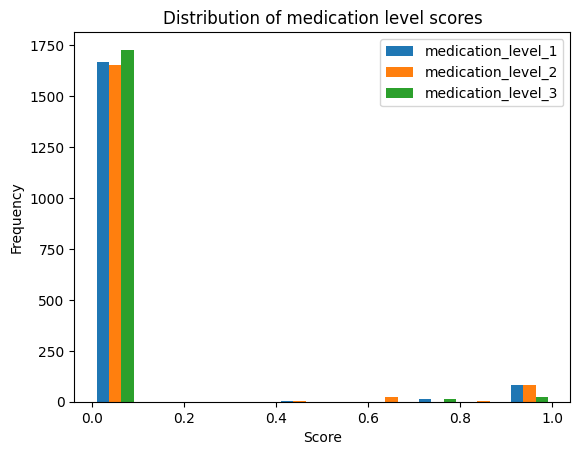

In [53]:
from sklearn.feature_extraction.text import TfidfVectorizer

# assuming your dataframe is called df and the column with text is called 'text_column'
tfidf = TfidfVectorizer(vocabulary=["medication_level_1", "medication_level_2", "medication_level_3"])
tfidf_matrix = tfidf.fit_transform(alertP1_text['clean_text'])

# create new columns for the scores
alertP1_text['medication_level_1'] = tfidf_matrix[:, 0].toarray()
alertP1_text['medication_level_2'] = tfidf_matrix[:, 1].toarray()
alertP1_text['medication_level_3'] = tfidf_matrix[:, 2].toarray()

demo = alertP1_text[(alertP1_text['medication_level_1'] > 0)][["medication_level_1","Texto","clean_text"]]


import matplotlib.pyplot as plt

plt.hist([alertP1_text['medication_level_1'], alertP1_text['medication_level_2'], alertP1_text['medication_level_3']], bins=10, label=['medication_level_1', 'medication_level_2', 'medication_level_3'])
plt.title('Distribution of medication level scores')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.legend()
plt.show()

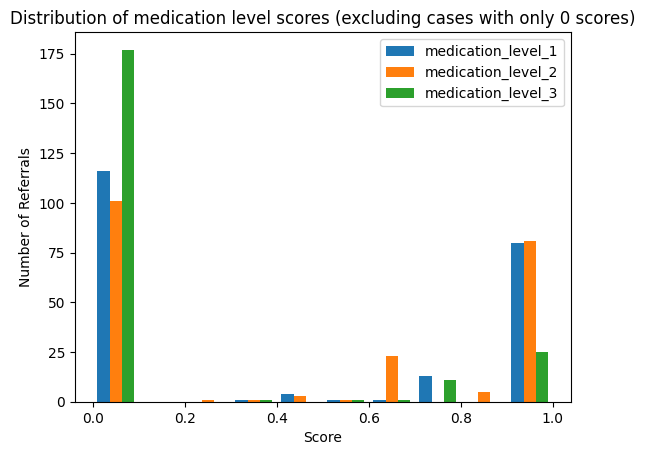

In [54]:
# create a new dataframe that only includes rows where the score is not 0
df_nonzero = alertP1_text[(alertP1_text['medication_level_1'] != 0) | (alertP1_text['medication_level_2'] != 0) | (alertP1_text['medication_level_3'] != 0)]

plt.hist([df_nonzero['medication_level_1'], df_nonzero['medication_level_2'], df_nonzero['medication_level_3']], bins=10, label=['medication_level_1', 'medication_level_2', 'medication_level_3'])
plt.title('Distribution of medication level scores (excluding cases with only 0 scores)')
plt.xlabel('Score')
plt.ylabel('Number of Referrals')
plt.legend()
plt.show()

In [7]:
load_data("modified_dataset.csv",alertP1)

Data file 'modified_dataset.csv' downloaded and saved to 'downloads' directory.


,ID_DOENTE,PROCESSO,COD_REFERENCIA,COD_PZ,COD_UNID_SAUDE_PROV,UNID_PROV,TIPO_UNID,PROVENIENCIA,COD_CTH_PRIOR,CTH_PRIOR,...,DATA_REALIZACAO,OBSERVACOES,Mês_entrada,Ano_entrada,trata data recusa,resume saída,mês_saida,ano_saida,Texto,clean_text
0,SSHCCB,LVMVDV,LQHSOQLH,GDCADAB,3151575,USF TORRE DA MARINHA,CS/USF,CTH,3,Normal,...,2015-06-12,,11,2014,2015-05-21,12/06/2015,6,2015,"Utente de 75 anos, refere tremor desde há 5 an...",75 ano tremor desde 5 ano esquecimento dificul...
1,CSAS,LVMVBD,LOHLTRTS,FZFZSDB,3152471,USF SERVIR SAUDE-CS,CS/USF,CTH,,unknown,...,2012-07-02,,4,2012,2012-04-23,02/07/2012,7,2012,Avaliação neurologica para avaliação da toma d...,avaliação neurologico avaliação tomar anti-epi...
2,ADCFD,LVMMVJ,LQHROQHL,,0,,OUTRA,SAM,,unknown,...,2015-01-13,,9,2014,2014-09-26,13/01/2015,1,2015,cefaleias,cefaleia
3,SSZDBZ,LVMMLV,LPHQULSU,CSGGHEZ,3151672,USF AMORA SAUDAVEL,CS/USF,CTH,,unknown,...,2013-12-03,,10,2013,2013-10-25,03/12/2013,12,2013,"Utente do sexo feminino com 30 anos de idade, ...",sexo feminino 30 ano idade aparentemente saidá...
4,SEAHEG,LVMNDL,LPHHVHVL,,0,,OUTRA,unknown,,unknown,...,NaT,Conforme e-mail de 30/11/2015,2,2013,2013-02-26,26/02/2013,2,2013,Sem relatorio clinico,relatorio clinico
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10145,GSECFZ,,LSHSRVTP,,0,,OUTRA,SON,,unknown,...,NaT,doente desistiu em 26/9-voltou para Cabo Verde,9,2016,2016-09-23,23/09/2016,9,2016,,
10146,GSFFSC,,LSHTPHVS,ZEHGFBSH,3151104,MIGUEL BOMBARDA,CS/USF,CTH,,unknown,...,NaT,,10,2016,2017-01-13,13/01/2017,1,2017,,
10147,GSCHDB,,LSHTVPOP,,0,,OUTRA,SAM,,unknown,...,NaT,utente não entregou pedido SAM,11,2016,2016-11-17,17/11/2016,11,2016,,
10148,GSBZAA,,LSHUQOPP,ZEESAADG,3151101,ALHOS VEDROS,CS/USF,CTH,,unknown,...,NaT,,11,2016,2017-02-10,10/02/2017,2,2017,,
